<a href="https://colab.research.google.com/github/aminyG/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

###Transformasi Linier Brigthness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


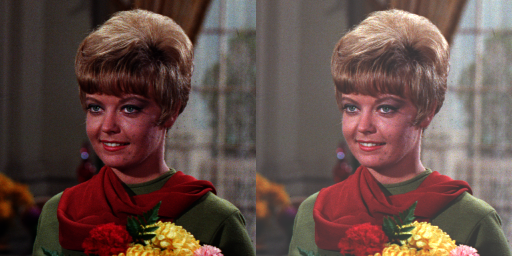

In [3]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/pcvk/photo/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

###Task
1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:

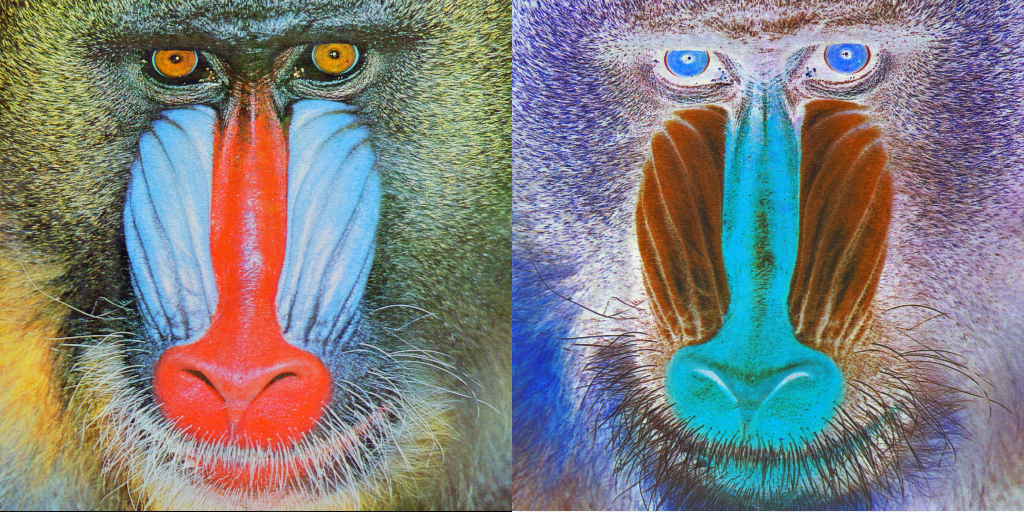

In [ ]:
original = cv.imread('/content/drive/MyDrive/pcvk/photo/mandrill.tiff')
negative_image = np.zeros(original.shape, original.dtype)

negative_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)

2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:60
Masukkan kontras [1.0 - 3.0]:1.5


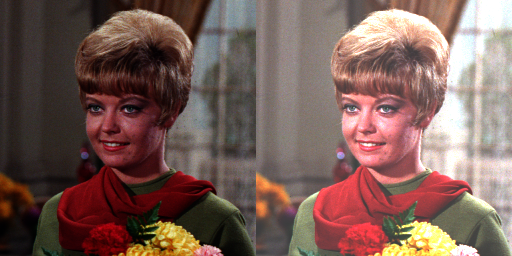

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/photo/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implement transformation of logarithmic brightness on Google Colaboratory using the
formula written in the Theoretical Background Reviews, generating output shown in the following figure:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:40


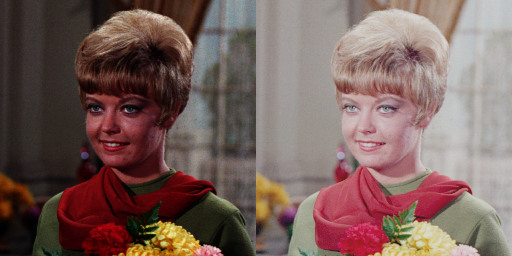

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/photo/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)


#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implement grayscale transformation using the averaging, lightness, and luminance
method on Google Colaboratory using the formula written in the Theoretical
Background Reviews, generating output as follows :

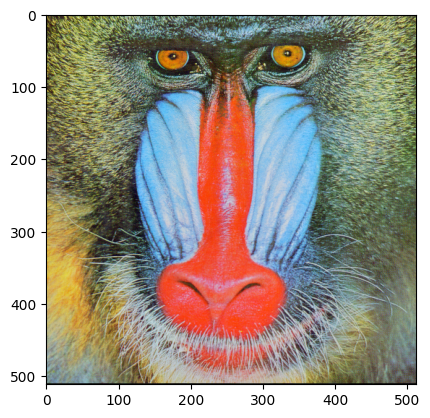

In [9]:
img = cv.imread('/content/drive/MyDrive/pcvk/photo/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

a. Averaging

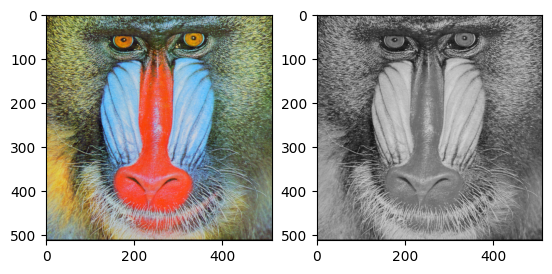

In [10]:
img_avg = cv.imread('/content/drive/MyDrive/pcvk/photo/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

b. Lightness

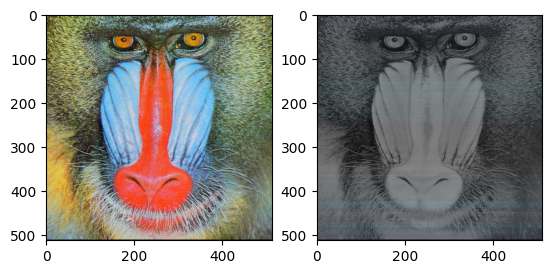

In [11]:
img_lightness = img
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=100)/2 + np.min(img_lightness,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lightness)

c. Luminance

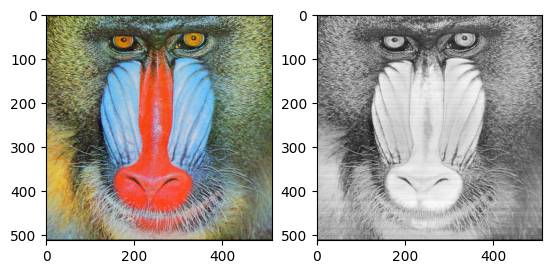

In [12]:
img_luminance = img
R, G, B = img_luminance[:,:,0], img_luminance[:,:,1], img_luminance[:,:,2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_luminance, cmap='gray')

5. Show certain colors in the image , and change other colors to grayscale. For example, show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :

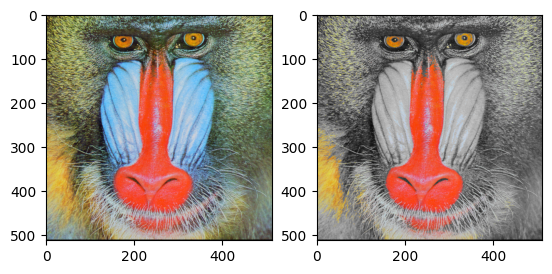

In [15]:
img = cv.imread('/content/drive/MyDrive/pcvk/photo/mandrill.tiff')
ret, mask = cv.threshold(img [:,:,2], 180, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img, 255 - mask3)
out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')